In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.80731899522125 -113.74307896489218
-8.063583507289394 -38.2713542224389
16.738871308066194 -58.30086380703966
-24.576064971487042 123.31123702669618
44.22042948589399 -13.860190409802328
4.395620953183027 -32.7659566183886
56.12516624180577 74.59780897839093
67.42658058554264 82.24022421221565
-42.0205846826733 -38.38934133811759
42.931508200426805 -130.6899215430809
-33.34530865374373 -119.8671822629612
77.73196875923759 -39.35481378541391
5.710129566738431 -99.12165332143279
23.0094819679624 109.256551779343
-83.20007494069381 120.20900026279133
-30.33021101164723 29.25033657828925
-24.39381034729064 -32.70374754882451
-35.24973156811298 61.98184576746388
-40.94632765824719 -42.14153352272709
72.4829347383014 -125.19402893875503
56.913470541547156 -63.440114924617845
-33.30383362250869 -24.779268881824947
-61.290141711418585 55.91466290809913
33.7247581914487 171.77998382338012
76.62903527950346 125.75055250515732
16.582113007302397 35.56510206681111
31.99133421909896 -26.78132156

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 75.78,
  'feels_like': 76.48,
  'temp_min': 69.76,
  'temp_max': 80.4,
  'pressure': 1011,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 170},
 'clouds': {'all': 75},
 'dt': 1659395419,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659346601,
  'sunset': 1659398659},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1659346601,
 'sunset': 1659398659}

In [19]:
boston_data['sys']["country"]

'US'

In [20]:
boston_data['dt']

1659395419

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 80.4 73 75 10.36


In [22]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | serra talhada
Processing Record 3 of Set 1 | saint-francois
Processing Record 4 of Set 1 | port hedland
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | muromtsevo
Processing Record 8 of Set 1 | krasnoselkup
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | north bend
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | guicheng
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kokstad
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | havre-saint-pierre
Processi

Processing Record 37 of Set 4 | umaria
Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | satitoa
City not found. Skipping...
Processing Record 40 of Set 4 | olga
Processing Record 41 of Set 4 | mao
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | damietta
Processing Record 47 of Set 4 | kem
Processing Record 48 of Set 4 | vysokogornyy
Processing Record 49 of Set 4 | burnie
Processing Record 50 of Set 4 | leh
Processing Record 1 of Set 5 | la palma
Processing Record 2 of Set 5 | tiznit
Processing Record 3 of Set 5 | khandyga
Processing Record 4 of Set 5 | vangaindrano
Processing Record 5 of Set 5 | batagay
Processing Record 6 of Set 5 | imphal
Processing Record 7 of Set 5 | nador
Processing Record 8 of Set 5 | chardara
Processing Record 9 of Set 5 | vung tau
Processing Record 10 of Set 5 | bang sai

Processing Record 24 of Set 8 | bandundu
Processing Record 25 of Set 8 | marawi
Processing Record 26 of Set 8 | altay
Processing Record 27 of Set 8 | nanning
Processing Record 28 of Set 8 | tinqueux
Processing Record 29 of Set 8 | baglung
Processing Record 30 of Set 8 | dhidhdhoo
Processing Record 31 of Set 8 | khor
Processing Record 32 of Set 8 | nadym
Processing Record 33 of Set 8 | kysyl-syr
Processing Record 34 of Set 8 | ribeira brava
Processing Record 35 of Set 8 | okha
Processing Record 36 of Set 8 | utiroa
City not found. Skipping...
Processing Record 37 of Set 8 | altamira
Processing Record 38 of Set 8 | mucurapo
Processing Record 39 of Set 8 | luba
Processing Record 40 of Set 8 | lopez jaena
Processing Record 41 of Set 8 | moravsky krumlov
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | ceres
Processing Record 44 of Set 8 | severo-kurilsk
Processing Record 45 of Set 8 | tutoia
Processing Record 46 of Set 8 | pochutla
Processing Record 47 of Set 8 | bet

Processing Record 14 of Set 12 | deputatskiy
Processing Record 15 of Set 12 | rawlins
Processing Record 16 of Set 12 | sunrise manor
Processing Record 17 of Set 12 | churapcha
Processing Record 18 of Set 12 | bay roberts
Processing Record 19 of Set 12 | grindavik
Processing Record 20 of Set 12 | chulumani
Processing Record 21 of Set 12 | conceicao do araguaia
Processing Record 22 of Set 12 | gushikawa
Processing Record 23 of Set 12 | alta
Processing Record 24 of Set 12 | le port
Processing Record 25 of Set 12 | abu zabad
Processing Record 26 of Set 12 | beira
Processing Record 27 of Set 12 | lolua
City not found. Skipping...
Processing Record 28 of Set 12 | baykit
Processing Record 29 of Set 12 | ust-maya
Processing Record 30 of Set 12 | wageningen
Processing Record 31 of Set 12 | kaeo
Processing Record 32 of Set 12 | banes
Processing Record 33 of Set 12 | chimoio
Processing Record 34 of Set 12 | cayenne
Processing Record 35 of Set 12 | itaituba
Processing Record 36 of Set 12 | taldan


In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,87.19,67,99,9.80,MX,2022-08-01 23:52:25
1,Serra Talhada,-7.9919,-38.2983,68.04,76,0,12.91,BR,2022-08-01 23:55:09
2,Saint-Francois,46.4154,3.9054,63.68,88,0,0.00,FR,2022-08-01 23:52:01
3,Port Hedland,-20.3167,118.5667,73.45,88,100,8.05,AU,2022-08-01 23:55:10
4,Muros,42.7762,-9.0603,71.10,71,1,7.90,ES,2022-08-01 23:55:10
5,Touros,-5.1989,-35.4608,75.04,85,9,12.41,BR,2022-08-01 23:55:11
6,Muromtsevo,56.3724,75.2418,50.40,81,48,6.20,RU,2022-08-01 23:55:11
7,Krasnoselkup,65.7000,82.4667,48.83,70,4,16.93,RU,2022-08-01 23:55:12
8,Cidreira,-30.1811,-50.2056,57.69,86,31,2.37,BR,2022-08-01 23:55:12
9,North Bend,43.4065,-124.2243,69.93,88,75,10.36,US,2022-08-01 23:55:03


In [29]:
#Changing order
new_city_data_df=city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

new_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-08-01 23:52:25,22.8909,-109.9124,87.19,67,99,9.80
1,Serra Talhada,BR,2022-08-01 23:55:09,-7.9919,-38.2983,68.04,76,0,12.91
2,Saint-Francois,FR,2022-08-01 23:52:01,46.4154,3.9054,63.68,88,0,0.00
3,Port Hedland,AU,2022-08-01 23:55:10,-20.3167,118.5667,73.45,88,100,8.05
4,Muros,ES,2022-08-01 23:55:10,42.7762,-9.0603,71.10,71,1,7.90


In [31]:
# Create the output file (CSV).
new_city_data_df = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(new_city_data_df, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

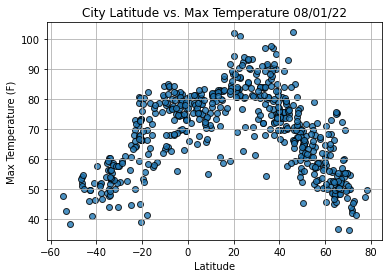

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

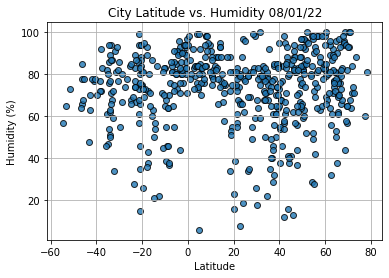

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

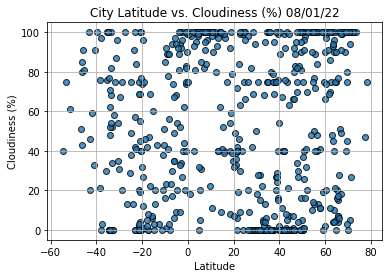

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

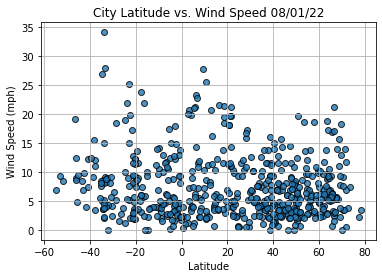

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()